In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
dfTrain = pd.read_csv("clean_train.csv", header = None, skiprows= 1)
dfTrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,584,0,1,"Ross, Mr. John Hugo",0,36.0,0,0,13049,40.1250,7,-1.0
1,476,0,1,"Clifford, Mr. George Quincy",0,0.0,0,0,110465,52.0000,7,0.0
2,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,48.0,1,0,11755,39.6000,7,-1.0
3,285,0,1,"Smith, Mr. Richard William",0,0.0,0,0,113056,26.0000,7,0.0
4,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,1,0,PC 17485,56.9292,7,-1.0


In [6]:
dfCT = dfTrain.drop([3,8], axis=1)

In [23]:
dfCT.head()

,0,1,2,4,5,6,7,9,10,11
0,584,0,1,0,36.0,0,0,40.1250,7,-1.0
1,476,0,1,0,0.0,0,0,52.0000,7,0.0
2,557,1,1,1,48.0,1,0,39.6000,7,-1.0
3,285,0,1,0,0.0,0,0,26.0000,7,0.0
4,600,1,1,0,49.0,1,0,56.9292,7,-1.0


In [24]:
y = dfCT[1]
y_ar = y.values
y_ar

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
dfCT2 = dfCT.drop([1], axis=1)

In [25]:
dfCT2.head()

,0,2,4,5,6,7,9,10,11
0,584,1,0,36.0,0,0,40.1250,7,-1.0
1,476,1,0,0.0,0,0,52.0000,7,0.0
2,557,1,1,48.0,1,0,39.6000,7,-1.0
3,285,1,0,0.0,0,0,26.0000,7,0.0
4,600,1,0,49.0,1,0,56.9292,7,-1.0


In [26]:
listCT = dfCT2.values
listCT

array([[584.   ,   1.   ,   0.   , ...,  40.125,   7.   ,  -1.   ],
       [476.   ,   1.   ,   0.   , ...,  52.   ,   7.   ,   0.   ],
       [557.   ,   1.   ,   1.   , ...,  39.6  ,   7.   ,  -1.   ],
       ...,
       [887.   ,   2.   ,   0.   , ...,  13.   ,   0.   ,   0.   ],
       [889.   ,   3.   ,   1.   , ...,  23.45 ,   0.   ,   0.   ],
       [891.   ,   3.   ,   0.   , ...,   7.75 ,   0.   ,   1.   ]])

In [27]:
dfTest = pd.read_csv("clean_test.csv", header = None, skiprows= 1)
dfTest.head()

,0,1,2,3,4,5,6,7,8,9,10
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0


In [28]:
dfTT = dfTest.drop([2,7], axis=1)
dfTT.head()

,0,1,3,4,5,6,8,9,10
0,892,3,0,34.5,0,0,7.8292,0,1
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,0,1
3,895,3,0,27.0,0,0,8.6625,0,0
4,896,3,1,22.0,1,1,12.2875,0,0


In [29]:
listTT = dfTT.values
listTT

array([[ 8.92000e+02,  3.00000e+00,  0.00000e+00, ...,  7.82920e+00,
         0.00000e+00,  1.00000e+00],
       [ 8.93000e+02,  3.00000e+00,  1.00000e+00, ...,  7.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 8.94000e+02,  2.00000e+00,  0.00000e+00, ...,  9.68750e+00,
         0.00000e+00,  1.00000e+00],
       ...,
       [ 1.30700e+03,  3.00000e+00,  0.00000e+00, ...,  7.25000e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.30800e+03,  3.00000e+00,  0.00000e+00, ...,  8.05000e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.30900e+03,  3.00000e+00,  0.00000e+00, ...,  2.23583e+01,
         0.00000e+00, -1.00000e+00]])

In [30]:
dfRes = pd.read_csv("TitanicResult.csv", header = None, skiprows= 1)
dfRes.head()

,0,1
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [31]:
y_test = dfRes[1].values
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(listCT.reshape(-1, 1))

In [33]:
X_train_scaled = X_scaler.transform(listCT)
X_test_scaled = X_scaler.transform(listTT)

k: 1, Train/Test Score: 1.000/0.634
k: 3, Train/Test Score: 0.781/0.600
k: 5, Train/Test Score: 0.746/0.648
k: 7, Train/Test Score: 0.730/0.651
k: 9, Train/Test Score: 0.698/0.653
k: 11, Train/Test Score: 0.692/0.646
k: 13, Train/Test Score: 0.682/0.660
k: 15, Train/Test Score: 0.691/0.651
k: 17, Train/Test Score: 0.694/0.651
k: 19, Train/Test Score: 0.692/0.648
k: 21, Train/Test Score: 0.692/0.648
k: 23, Train/Test Score: 0.695/0.648
k: 25, Train/Test Score: 0.687/0.646
k: 27, Train/Test Score: 0.685/0.646
k: 29, Train/Test Score: 0.685/0.646


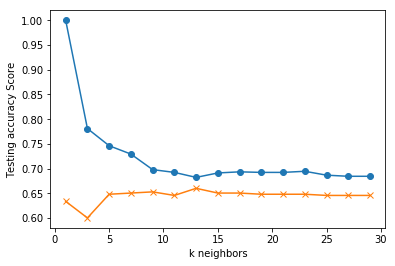

In [40]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_ar)
    train_score = knn.score(X_train_scaled, y_ar)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(listCT, y_ar)
print('k=9 Test Acc: %.3f' % knn.score(listTT, y_test))

k=9 Test Acc: 0.660
